<a href="https://colab.research.google.com/github/vijaykumarelumalai/googlecolab/blob/main/Hcc_liver_detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-5c63dcf17b78>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liver_data['Albumin_and_Globulin_Ratio'].fillna(


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


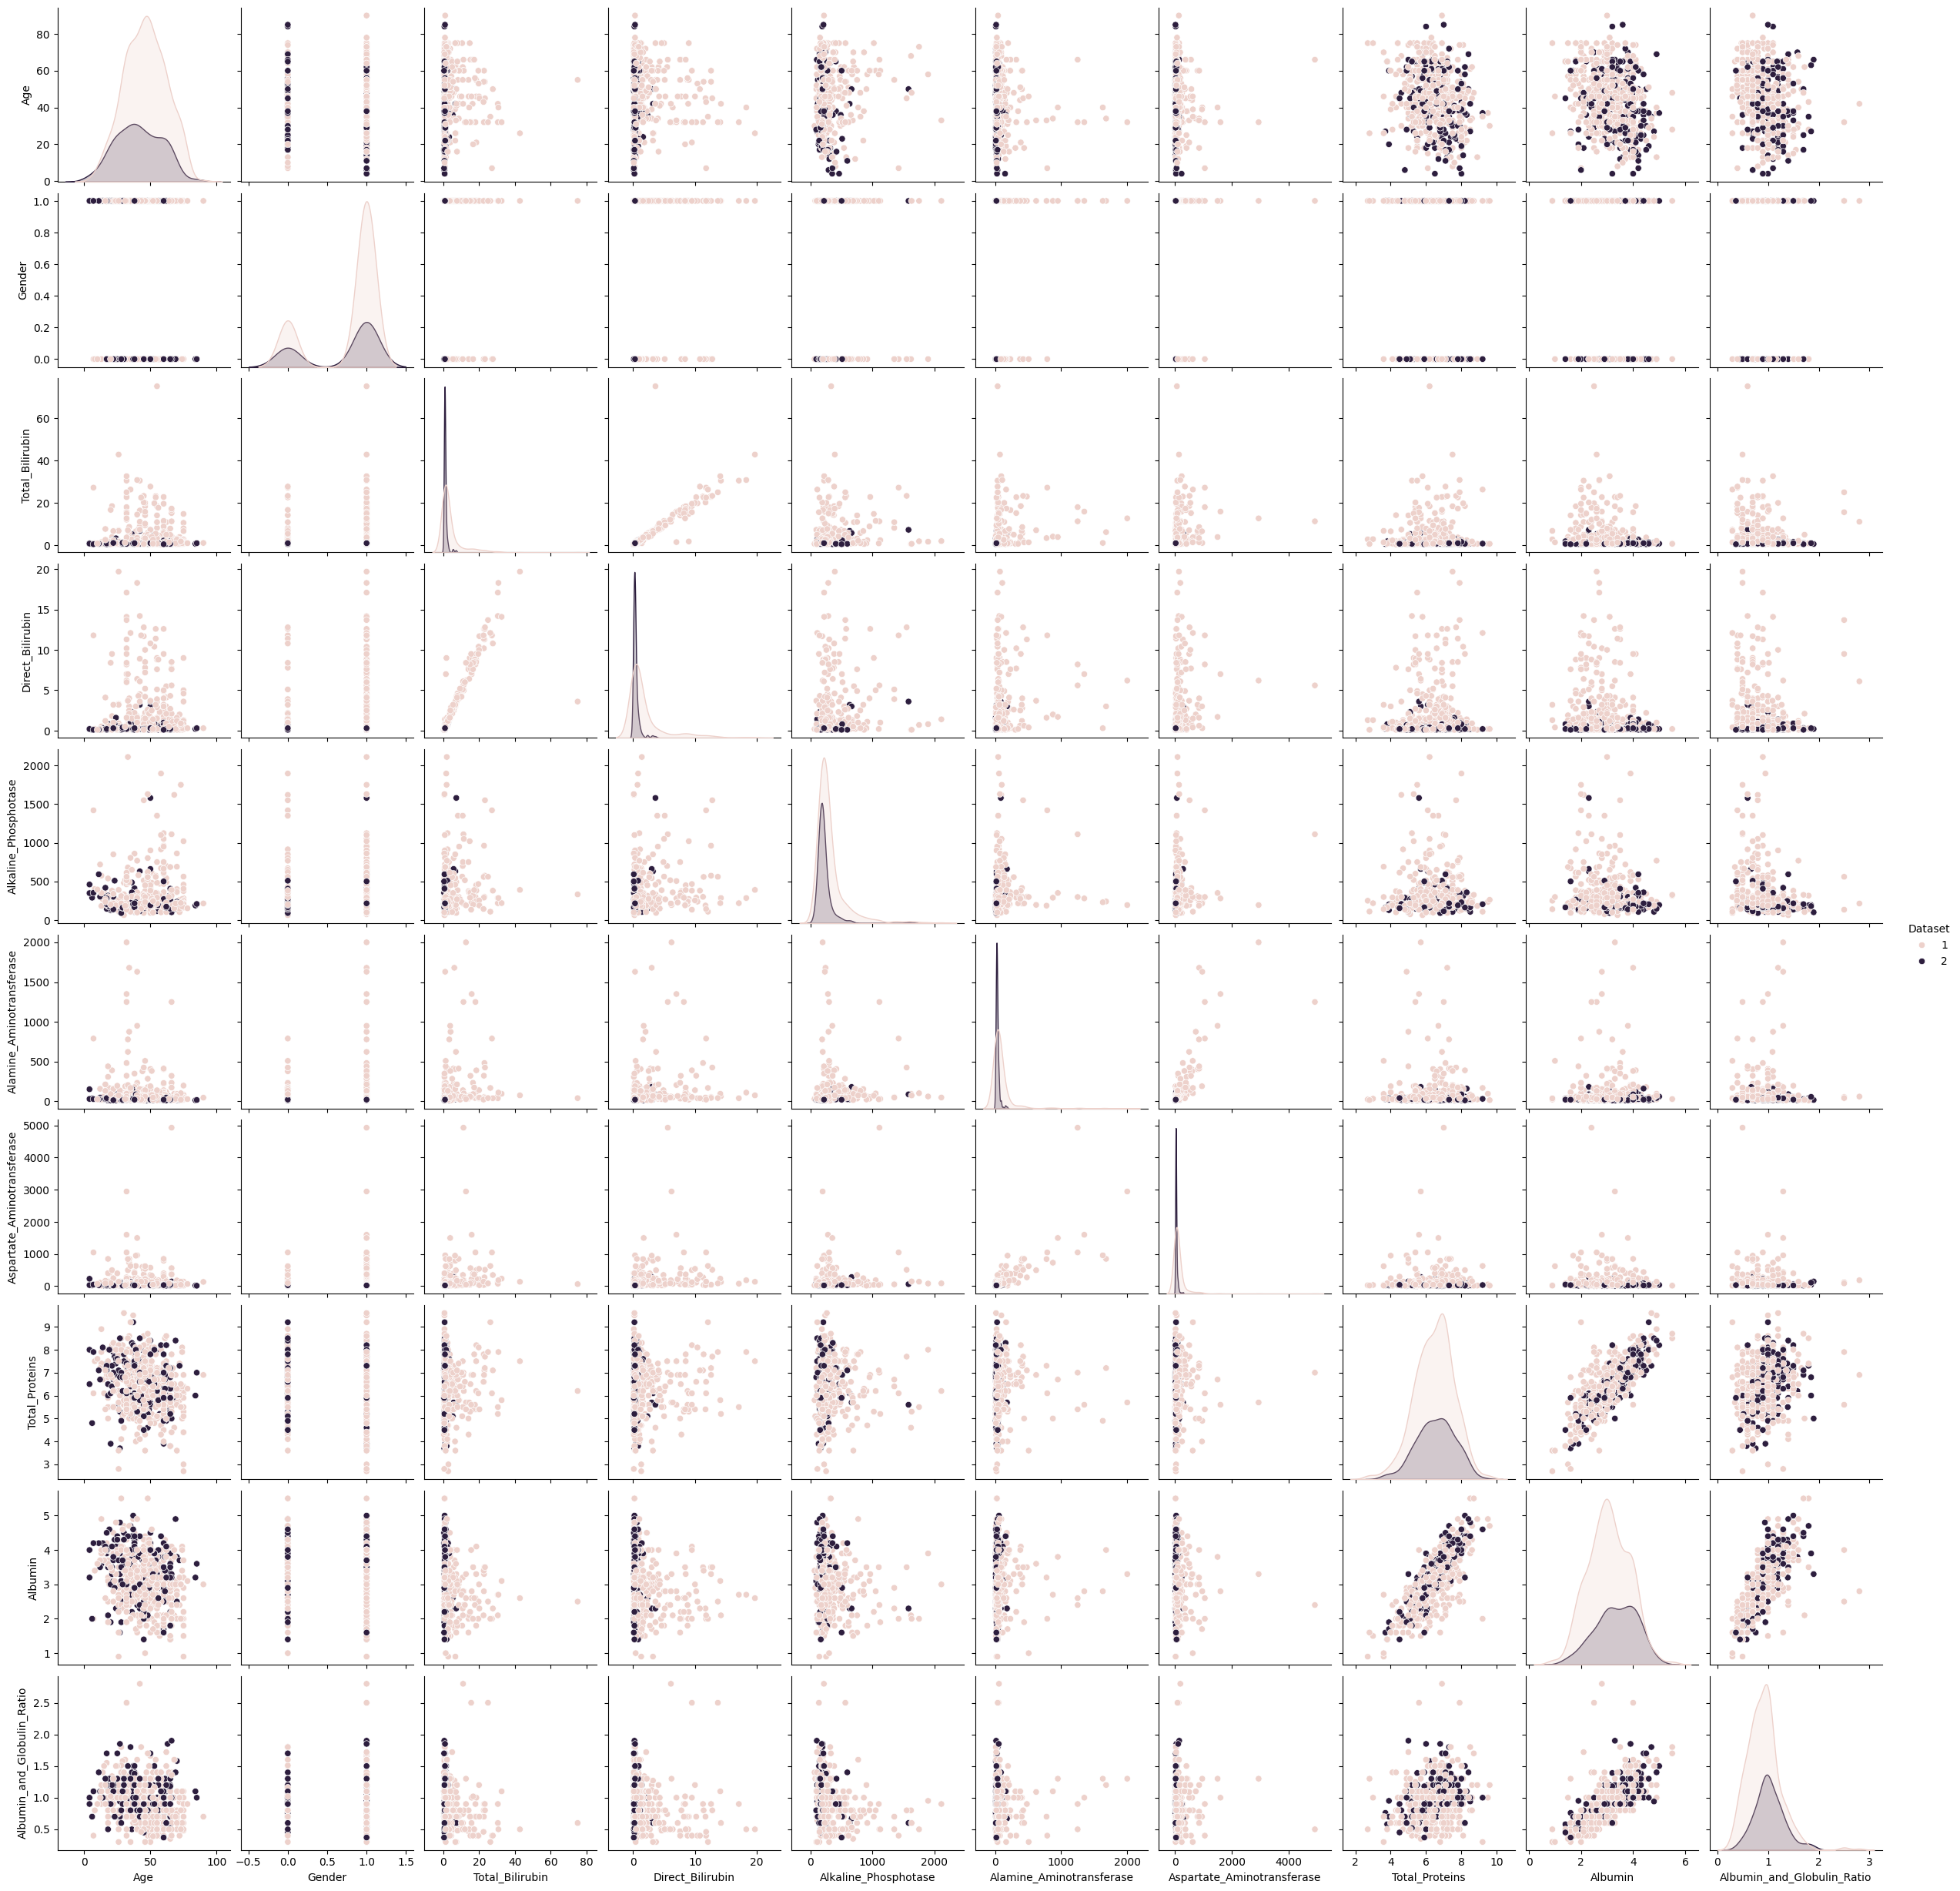

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the liver dataset
liver_data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')

# Correcting the column names based on the dataset structure
liver_data.columns = [
    'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins',
    'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'
]

# Convert 'Gender' column to binary (Male: 1, Female: 0)
liver_data['Gender'] = liver_data['Gender'].map({'Male': 1, 'Female': 0})

# Handle missing values in the 'Albumin_and_Globulin_Ratio' column
liver_data['Albumin_and_Globulin_Ratio'].fillna(
    liver_data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

# Check for missing values
print(liver_data.isnull().sum())

# Exploratory Data Analysis (EDA) - Optional Step
# Visualizing the distribution of features
sns.pairplot(liver_data, hue="Dataset")
plt.show()

# Separating features and target labels
liver_data_features = liver_data.drop(['Dataset'], axis=1)
liver_data_labels = liver_data['Dataset']

# Log transform the features (adding 1 to avoid log(0))
liver_data_features_log_transformed = liver_data_features.apply(lambda x: np.log(x + 1))

# Scaling the features to a 0-1 range using MinMaxScaler
scaler = MinMaxScaler()
liver_data_features_scaled = scaler.fit_transform(liver_data_features_log_transformed)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_scaled, liver_data_labels,
                                                    test_size=0.2, random_state=24)

# 1. SVC with Gamma optimization
parameters = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}
scorer = make_scorer(fbeta_score, beta=2)
svc = SVC(random_state=24)
grid_svc = GridSearchCV(svc, param_grid=parameters, scoring=scorer, n_jobs=-1, cv=5)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_

# SVC Performance (ROC, AUC)
y_pred_svc = best_svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc_svc = auc(fpr, tpr)
print(f"SVC AUC: {roc_auc_svc}")

# 2. MLPClassifier with Adam Optimizer
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(50,), max_iter=1000, random_state=24)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP AUC: {roc_auc_mlp}, MSE: {mse_mlp}")

# 3. Calculate Sensitivity, Specificity, and other metrics
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mse = mean_squared_error(y_true, y_pred)
    return sensitivity, specificity, mse

# Calculate for best SVC model
sensitivity_svc, specificity_svc, mse_svc = calculate_metrics(y_test, y_pred_svc)
print(f"SVC Sensitivity: {sensitivity_svc}, Specificity: {specificity_svc}, MSE: {mse_svc}")

# Plot the ROC Curve for SVC
plt.figure()
plt.plot(fpr, tpr, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.title('ROC Curve for SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Repeat ROC plots for other models (MLP, etc.) as needed


In [3]:
# Convert 'Gender' column to binary (Male: 1, Female: 0)
liver_data['Gender'] = liver_data['Gender'].map({'Male': 1, 'Female': 0})

# Handle missing values in the 'Albumin_and_Globulin_Ratio' column
liver_data['Albumin_and_Globulin_Ratio'].fillna(
    liver_data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

# Check for missing values
print(liver_data.isnull().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


<ipython-input-3-6d27e2f48316>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liver_data['Albumin_and_Globulin_Ratio'].fillna(


In [ ]:
# Exploratory Data Analysis (EDA) - Optional Step
# Visualizing the distribution of features
sns.pairplot(liver_data, hue="Dataset")
plt.show()

# Separating features and target labels
liver_data_features = liver_data.drop(['Dataset'], axis=1)
liver_data_labels = liver_data['Dataset']

# Log transform the features (adding 1 to avoid log(0))
liver_data_features_log_transformed = liver_data_features.apply(lambda x: np.log(x + 1))

# Scaling the features to a 0-1 range using MinMaxScaler
scaler = MinMaxScaler()
liver_data_features_scaled = scaler.fit_transform(liver_data_features_log_transformed)

<ipython-input-1-3de61acd0861>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liver_data['Albumin_and_Globulin_Ratio'].fillna(


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


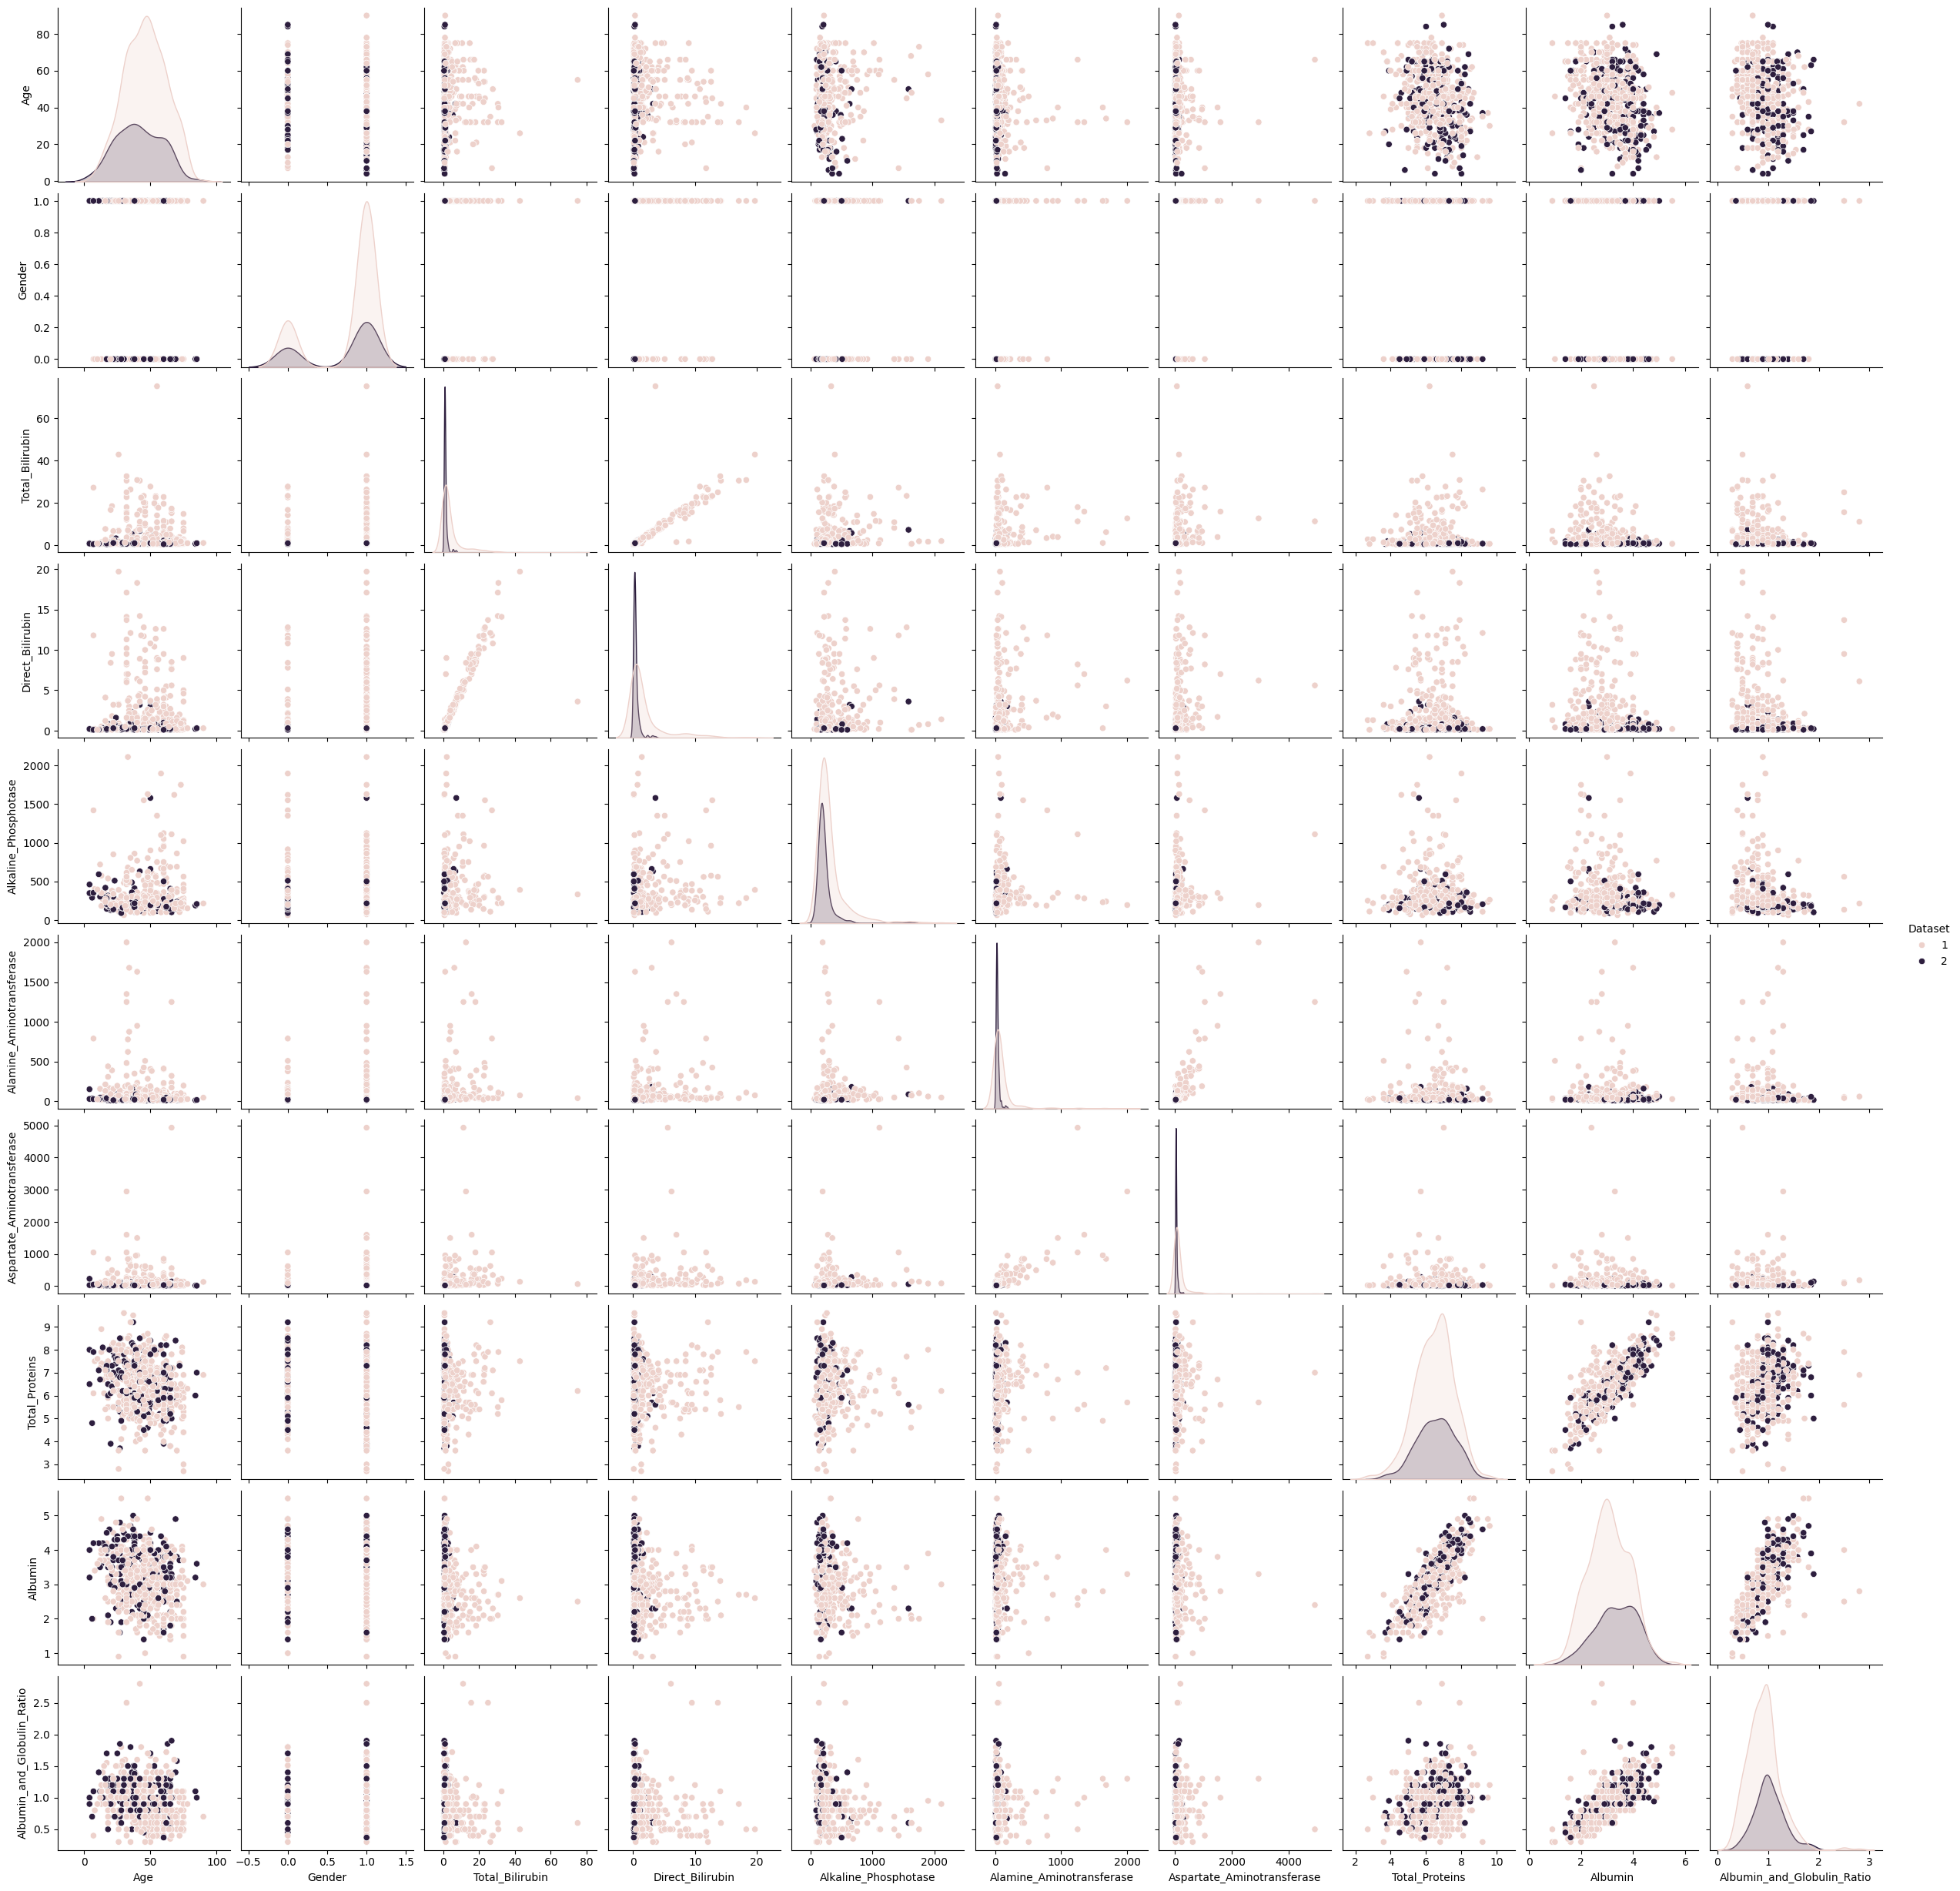

SVC AUC: 0.5384615384615384
MLP AUC: 0.5576923076923077, MSE: 0.3504273504273504
SVC Sensitivity: 0.20512820512820512, Specificity: 0.8717948717948718, MSE: 0.3504273504273504


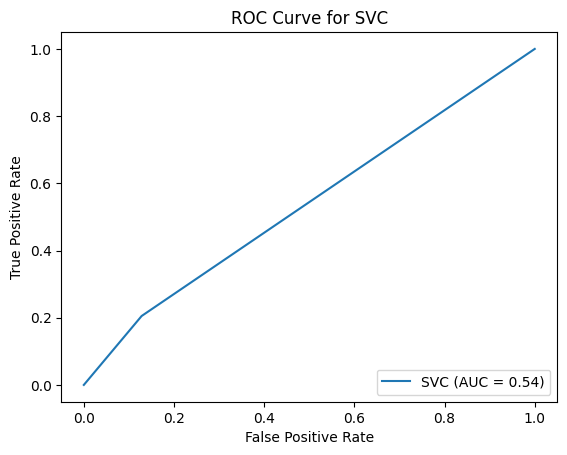

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the liver dataset
liver_data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')

# Correcting the column names based on the dataset structure
liver_data.columns = [
    'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins',
    'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'
]

# Convert 'Gender' column to binary (Male: 1, Female: 0)
liver_data['Gender'] = liver_data['Gender'].map({'Male': 1, 'Female': 0})

# Handle missing values in the 'Albumin_and_Globulin_Ratio' column
liver_data['Albumin_and_Globulin_Ratio'].fillna(
    liver_data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

# Check for missing values
print(liver_data.isnull().sum())

# Exploratory Data Analysis (EDA) - Optional Step
# Visualizing the distribution of features
sns.pairplot(liver_data, hue="Dataset")
plt.show()

# Separating features and target labels
liver_data_features = liver_data.drop(['Dataset'], axis=1)
liver_data_labels = liver_data['Dataset']

# Log transform the features (adding 1 to avoid log(0))
liver_data_features_log_transformed = liver_data_features.apply(lambda x: np.log(x + 1))

# Scaling the features to a 0-1 range using MinMaxScaler
scaler = MinMaxScaler()
liver_data_features_scaled = scaler.fit_transform(liver_data_features_log_transformed)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_scaled, liver_data_labels,
                                                    test_size=0.2, random_state=24)

# Map labels from {1, 2} to {0, 1} for binary classification
y_train_binary = y_train.map({1: 0, 2: 1})
y_test_binary = y_test.map({1: 0, 2: 1})

# 1. SVC with Gamma optimization
parameters = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}
scorer = make_scorer(fbeta_score, beta=2)
svc = SVC(random_state=24)
grid_svc = GridSearchCV(svc, param_grid=parameters, scoring=scorer, n_jobs=-1, cv=5)
grid_svc.fit(X_train, y_train_binary)
best_svc = grid_svc.best_estimator_

# SVC Performance (ROC, AUC)
y_pred_svc = best_svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_svc)
roc_auc_svc = auc(fpr, tpr)
print(f"SVC AUC: {roc_auc_svc}")

# 2. MLPClassifier with Adam Optimizer
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(50,), max_iter=1000, random_state=24)
mlp.fit(X_train, y_train_binary)
y_pred_mlp = mlp.predict(X_test)
roc_auc_mlp = roc_auc_score(y_test_binary, y_pred_mlp)
mse_mlp = mean_squared_error(y_test_binary, y_pred_mlp)
print(f"MLP AUC: {roc_auc_mlp}, MSE: {mse_mlp}")

# 3. Calculate Sensitivity, Specificity, and other metrics
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mse = mean_squared_error(y_true, y_pred)
    return sensitivity, specificity, mse

# Calculate for best SVC model
sensitivity_svc, specificity_svc, mse_svc = calculate_metrics(y_test_binary, y_pred_svc)
print(f"SVC Sensitivity: {sensitivity_svc}, Specificity: {specificity_svc}, MSE: {mse_svc}")

# Plot the ROC Curve for SVC
plt.figure()
plt.plot(fpr, tpr, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.title('ROC Curve for SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Repeat ROC plots for other models (MLP, etc.) as needed
